# KC Roasters - Problem Statement

### Due Date : Feb 23, 11:59 PM IST

### Marks: 60

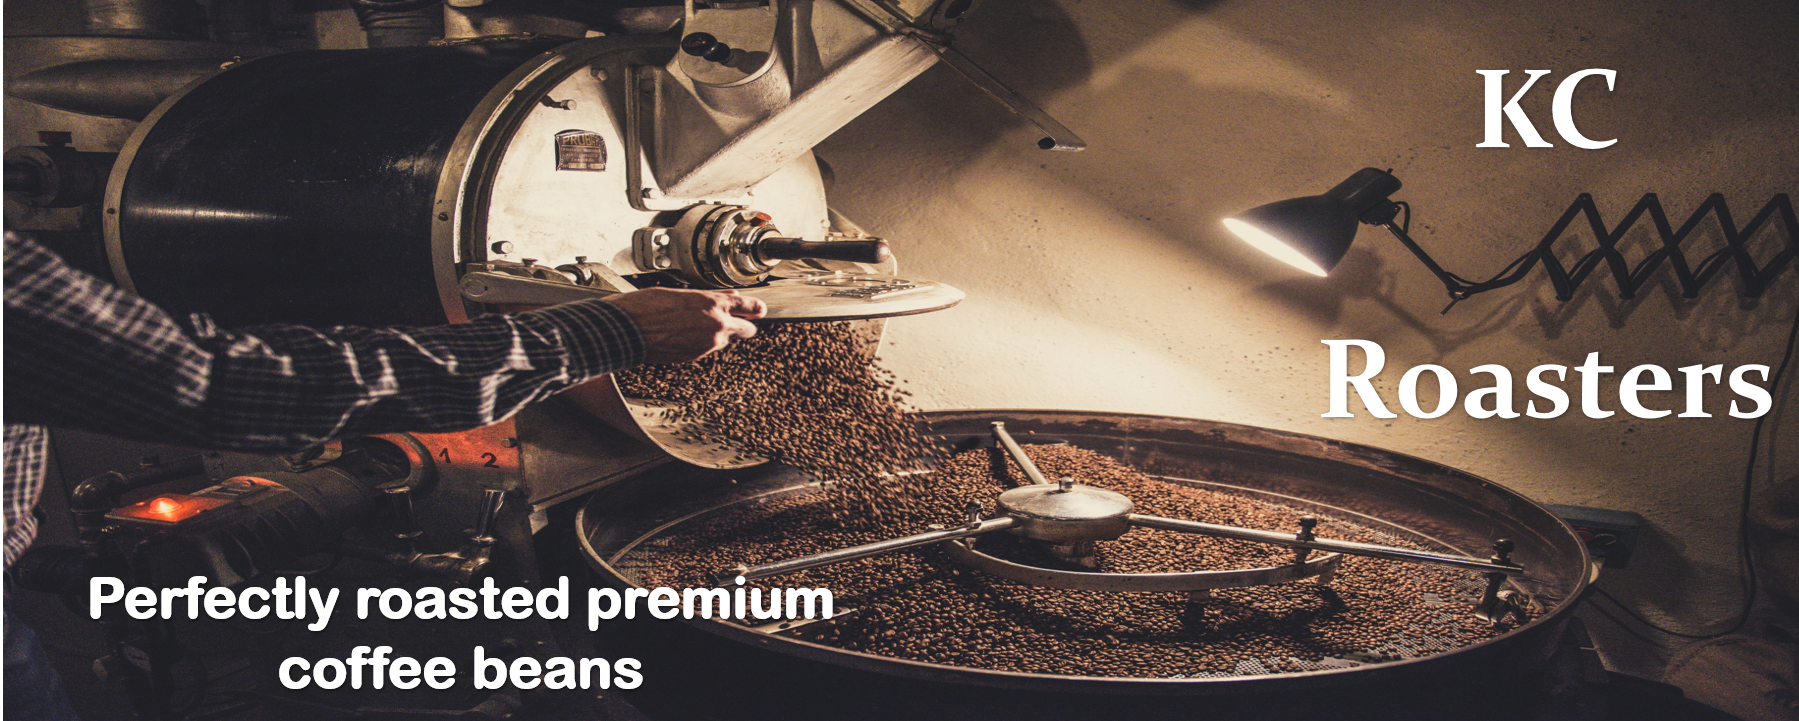

**Context**

Coffee roasting is the process of turning green coffee beans into brown ones. Brown coffee beans can be made in a variety of methods, which also influences the flavor of the end product. A roasting instrument is basically a convection oven. It is a mechanism of inflicting heat energy into the raw product which makes the product consumable.

And the price of coffee is heavily influenced by the quality of the beans after roasting. As a result, the cost can be determined depending on the quality of the beans after roasting.

The rising automation in the manufacturing business necessitates the automation of quality inspection of output products with minimal human intervention. Quality inspectors in businesses examine product quality after it is manufactured to ensure that it meets industry standards.

Each product's quality inspection is a time-consuming manual process, and a low-quality product wastes upstream factory capacity, consumables, labor, and money. With the emerging AI trend, companies are looking to leverage machine learning-based technologies to automate material quality inspection during the manufacturing process to reduce human intervention while achieving human-level or better accuracy.

**Objective**

A roasting corporation named "KC Roasters" has engaged you to predict the quality of a roasting instrument's outputs, which will be used to determine the price of coffee beans.
The quality value ranges from 0 to 100 with 0 being the worst and 100 being the best and the higher the quality of the beans, the higher the price.

The coffee roasting instrument used by Roasters is divided into five equal-sized compartments, each with three temperature sensors. 3 sensors have been installed at 3 different locations to be able to capture temperature at different locations inside the chamber.

Additionally, the height of raw material (volume entering the chamber) and relative humidity of roasted material is provided

The data shared consists of 17 predictor variables and a continuous target variable, and the aim is to build a Regression model which can accurately predict the quality of the product. After finding out the quality, the company can decide the cost of beans effectively.


**Data Description**

Roasters.csv - The Dataset consists of values of temperature of different chambers of the roasting instrument as collected by sensors.

**Data Dictionary:**

- T_data_1_1 - 1st sensor in the 1st chamber
- T_data_1_2 - 2nd sensor in the 1st chamber
- T_data_1_3 - 3rd sensor in the 1st chamber
- T_data_2_1 - 1st sensor in the 2nd chamber
- T_data_2_2 - 2nd sensor in the 2nd chamber
- T_data_2_3 - 3rd sensor in the 2nd chamber
- T_data_3_1 - 1st sensor in the 3rd chamber
- T_data_3_2 - 2nd sensor in the 3rd chamber
- T_data_3_3 - 3rd sensor in the 3rd chamber
- T_data_4_1 - 1st sensor in the 4th chamber
- T_data_4_2 - 2nd sensor in the 4th chamber
- T_data_4_3 - 3rd sensor in the 4th chamber
- T_data_5_1 - 1st sensor in the 5th chamber
- T_data_5_2 - 2nd sensor in the 5th chamber
- T_data_5_3 - 3rd sensor in the 5th chamber
- H_data - Height of Raw material layer, basically represents the volume of raw material going inside the chamber in pounds
- AH_data - Roasted Coffee beans relative humidity.



_________________________________________________________________________________________________________________________________________________________

##**Exploratory Data Analysis**

#### Definition of the problem (as per given problem statement with additional views) - Observations on the shape of data, data types of various attributes, missing values, statistical summary. -

**1. Problem Definition**

**Business Context:**

* Coffee roasting is a key step in producing high-quality coffee beans. The roasting process impacts flavor, aroma, and overall coffee quality.

* A company, KC Roasters, wants to automate quality assessment of roasted coffee beans to optimize pricing and reduce waste.

* The goal is to build a regression model that predicts the quality of roasted coffee beans based on temperature readings from sensors, raw material height, and roasted coffee humidity.

* **Higher quality → Higher pricing** for coffee beans.


**Technical Context:**

* The dataset consists of 15 temperature sensors (spread across 5 roasting chambers), along with two process-related parameters:
  * H_data (Raw material height, representing input volume).
  * AH_data (Relative humidity of roasted beans).
* The target variable (quality) ranges from 0 to 100.
* The company wants to implement machine learning-based automated quality control instead of manual inspections.

______________________________________________________________________________________________________

Exploratory Data Analysis - Observations on the shape of data, data types of various attributes, missing values, statistical summary. -

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
 # 2. Loading Dataset from Google Drive

import pandas as pd

# Defining file path
file_path = '/content/drive/MyDrive/Colab_Notebooks/Featurization_Model_Selection_Tuning/Data.csv'

# Loading dataset
df = pd.read_csv(file_path)

# Displaying first few rows
df.head()


T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  T_data_2_2  T_data_2_3  \
0         212         210         211         347         353         347   
1         212         211         211         346         352         346   
2         212         211         211         345         352         346   
3         213         211         211         344         351         346   
4         213         211         211         343         350         346   

   T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  T_data_4_2  T_data_4_3  \
0         474         473         481         346         348         355   
1         475         473         481         349         348         355   
2         476         473         481         352         349         355   
3         477         473         481         355         349         355   
4         478         473         482         358         349         355   

   T_data_5_1  T_data_5_2  T_data_5_3  H_data  AH_data  quality  
0         241         241         243  167.85     9.22       61  
1         241         241         243  162.51     9.22       57  
2         242         241         242  164.99     9.22       61  
3         242         241         242  167.34     9.22       63  
4         243         241         242  163.04     9.22       63

In [5]:
# =======================
# 3. Displaying Dataset Shape
# =======================
print("Dataset Shape:", df.shape)  # Printing the number of rows and columns

# =======================
# 4. Checking Data Types
# =======================
print("\nData Types:")
print(df.dtypes)  # Displaying the data types of each column

Dataset Shape: (29131, 18)

Data Types:
T_data_1_1      int64
T_data_1_2      int64
T_data_1_3      int64
T_data_2_1      int64
T_data_2_2      int64
T_data_2_3      int64
T_data_3_1      int64
T_data_3_2      int64
T_data_3_3      int64
T_data_4_1      int64
T_data_4_2      int64
T_data_4_3      int64
T_data_5_1      int64
T_data_5_2      int64
T_data_5_3      int64
H_data        float64
AH_data       float64
quality         int64
dtype: object


In [6]:
# =======================
# 5. Checking for Missing Values
# =======================
missing_values = df.isnull().sum()  # Calculating missing values per column
print("\nMissing Values:")
print(missing_values[missing_values > 0])  # Printing columns with missing values

# Filling missing values with column mean to prevent data loss
df.fillna(df.mean(), inplace=True)

# =======================
# 6. Displaying Statistical Summary of the Data
# =======================
print("\nStatistical Summary:")
print(df.describe())  # Generating summary statistics for numerical columns


Missing Values:
H_data     44
AH_data    31
dtype: int64

Statistical Summary:
         T_data_1_1    T_data_1_2    T_data_1_3    T_data_2_1    T_data_2_2  \
count  29131.000000  29131.000000  29131.000000  29131.000000  29131.000000   
mean     253.552058    254.078061    254.057636    343.075796    344.523669   
std       32.487764     30.024924     28.977460     32.543595     33.718698   
min       13.000000    168.000000    183.000000     70.000000    113.000000   
25%      232.000000    231.000000    232.000000    325.000000    326.000000   
50%      252.000000    254.000000    252.000000    344.000000    344.000000   
75%      280.000000    280.000000    279.000000    363.000000    364.000000   
max      343.000000    341.000000    339.000000    436.000000    598.000000   

         T_data_2_3    T_data_3_1    T_data_3_2    T_data_3_3    T_data_4_1  \
count  29131.000000  29131.000000  29131.000000  29131.000000  29131.000000   
mean     342.017335    494.513371    495.851155   

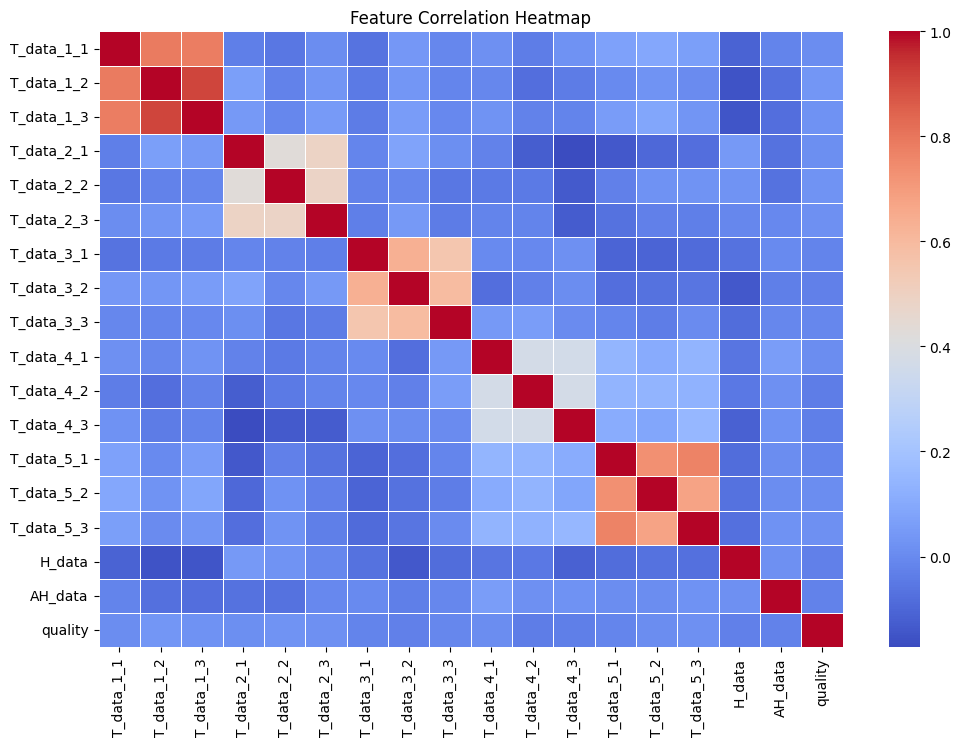

In [7]:
# =======================
# 7. Creating a Correlation Heatmap
# =======================
plt.figure(figsize=(12, 8))  # Setting figure size
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)  # Plotting heatmap to show feature correlation
plt.title("Feature Correlation Heatmap")  # Adding title to the heatmap
plt.show()  # Displaying the heatmap

### Observations from the above Correlation Heatmap:

1. **Strong Correlation Among Sensors in the Same Chamber:**

* Temperature sensors within the same chamber (e.g., T_data_1_1, T_data_1_2, T_data_1_3) show a high correlation (close to 1.0), indicating redundancy.

* This suggests that some of these features can be aggregated (e.g., mean temperature per chamber) to reduce multicollinearity in modeling.

2. **Weak Correlation Between Temperature and Quality:**

* The quality score does not exhibit strong correlation with any individual temperature sensor.

* This suggests that temperature alone might not be a direct determinant of coffee quality, and other factors (e.g., humidity, raw material height) may play a more significant role.

3. **Moderate Correlation of H_data and AH_data with Quality:**

* H_data (Height of raw material) and AH_data (Humidity of roasted coffee) have some correlation with quality, indicating their potential importance in determining final quality.

4. **Low Correlation Between Different Chambers:**

* The temperature readings from different chambers do not show strong correlation with each other, suggesting that each chamber operates independently.


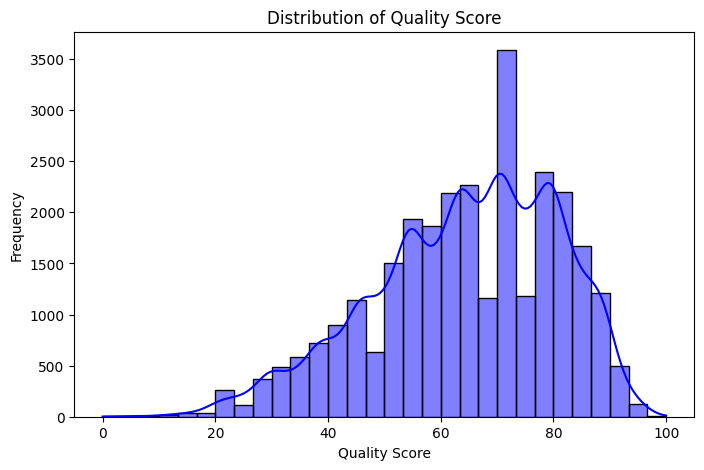

In [8]:
# ===============================================================
# 8. Plotting Distribution of Quality Score - UNIVARIATE ANALYSIS
# ===============================================================
plt.figure(figsize=(8, 5))  # Setting figure size
sns.histplot(df['quality'], bins=30, kde=True, color='blue')  # Creating histogram for quality score distribution
plt.title("Distribution of Quality Score")  # Adding title
plt.xlabel("Quality Score")  # Labeling X-axis
plt.ylabel("Frequency")  # Labeling Y-axis
plt.show()  # Displaying the plot

### Observations from the Quality Score Distribution:

1. **Right-Skewed Distribution with Peaks:**

  * The quality scores are not perfectly normally distributed.
  * There are distinct peaks, suggesting that the data might be clustered into different quality levels.

2. **Majority of Quality Scores Between 40-90:**

  * Most of the quality scores fall between 40 and 90, with a higher concentration between 60 and 80.
  * This suggests that extreme low-quality (0-30) and high-quality (90-100) beans are rare.

3. **Small Bumps Indicating Mode Clusters:**

  * The presence of small peaks indicates possible clustering of coffee quality into certain categories.
  * These clusters might be related to different roasting conditions or bean types.

4. **Outliers on Both Ends:**

  * There are a few low-quality beans (below 20) and high-quality beans (above 90), which could be rare instances worth further investigation.
  * These could indicate special cases such as experimental batches, errors, or premium-quality beans.

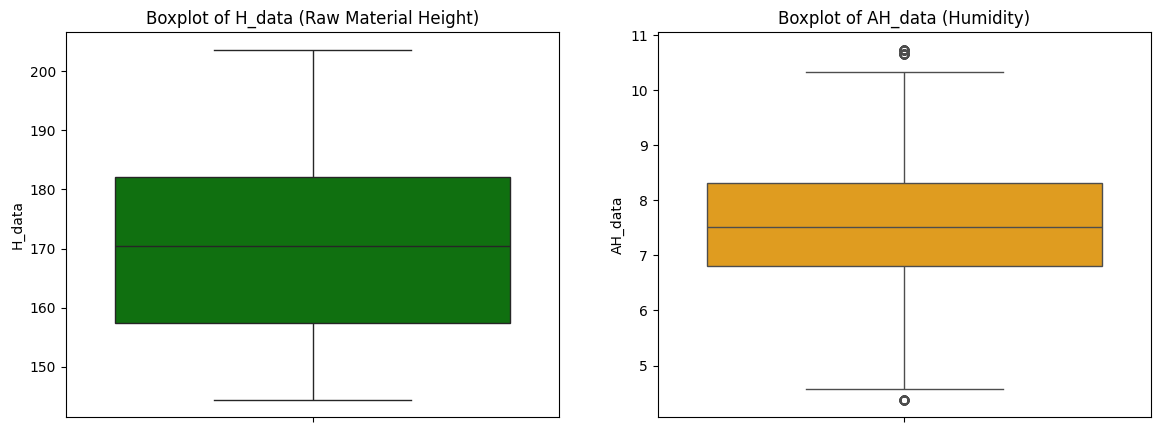

In [9]:
#================================================================================================
# Step 9: Plotting and displaying boxplots for raw material height and humidity to detect outliers
# ================================================================================================

fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # Creating subplots for boxplots
sns.boxplot(y=df['H_data'], ax=ax[0], color='green')  # Creating boxplot for raw material height
ax[0].set_title("Boxplot of H_data (Raw Material Height)")  # Adding title
sns.boxplot(y=df['AH_data'], ax=ax[1], color='orange')  # Creating boxplot for humidity
ax[1].set_title("Boxplot of AH_data (Humidity)")  # Adding title
plt.show()  # Displaying the boxplots

### Observations from the Boxplots:

1. **Boxplot of H_data (Raw Material Height)**
  * The height of raw material ranges between ~140 to ~205.
  * The median is around 170-175, indicating that most data points are centered around this range.
  * No extreme outliers are visible, suggesting a consistent distribution of raw material height.
2. **Boxplot of AH_data (Humidity of Roasted Coffee Beans)**
  * The humidity values range between ~5 to ~10.5.
  * The median is around 7.5-8.
  * A few outliers are present above 10 and below 5, indicating some rare variations in humidity levels.
  * These outliers might need further investigation to check if they impact coffee quality.

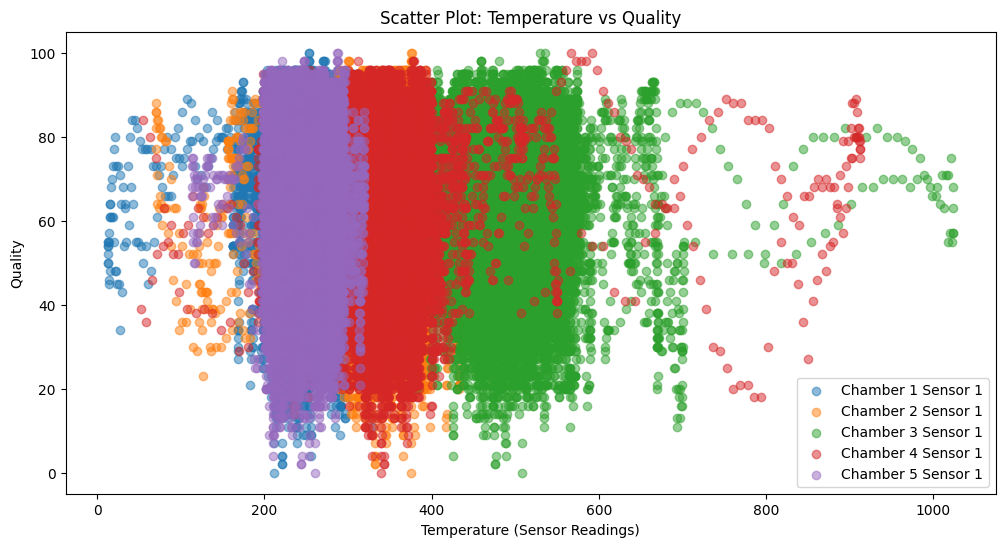

In [10]:
# PERFORMING BIVARIATE ANALYSIS

#================================================================================================
# Step 10: Creating and displaying a scatter plot to visualize the relationship between temperature and quality
#================================================================================================
plt.figure(figsize=(12, 6))  # Setting figure size
for i in range(1, 6):
    plt.scatter(df[f'T_data_{i}_1'], df['quality'], label=f'Chamber {i} Sensor 1', alpha=0.5)  # Creating scatter plot for each chamber
plt.xlabel("Temperature (Sensor Readings)")  # Labeling x-axis
plt.ylabel("Quality")  # Labeling y-axis
plt.title("Scatter Plot: Temperature vs Quality")  # Adding title
plt.legend()  # Displaying legend
plt.show()  # Displaying the scatter plot

### Observations from the Scatter Plot (Temperature vs. Quality):

1. **Distinct Temperature Clusters for Each Chamber:**

  * Each chamber has a separate temperature range, with little overlap.
  * This indicates that the roasting chambers operate independently, with their own distinct temperature conditions.

2. **Wide Spread of Quality Scores at Each Temperature Level:**

  * For each chamber, the quality scores vary significantly at similar temperature readings.
  * This suggests that temperature alone is not the sole determinant of coffee quality.
  * Other factors like humidity, raw material height, or roasting time may have a significant impact.

3. **Possible Non-Linear Relationships:**

  * Some chambers (e.g., Chamber 3 in green) show non-linear patterns, where quality initially increases with temperature but then declines.
  * This might suggest an optimal temperature range for producing higher-quality coffee.

4. **Chamber 5 (Purple) Appears to Have a Higher Spread of Quality:**

  * The quality scores in Chamber 5 appear more widely distributed compared to other chambers.
  * This could mean that this chamber has more variations in roasting conditions or inconsistencies in maintaining optimal roasting temperatures.

5. **Potential Anomalies at High Temperatures:**

  * A few red and green points at very high temperatures (~800-1000) seem to exhibit irregular patterns.
  * These could be anomalous data points or cases where the coffee was over-roasted, negatively impacting quality.

In [11]:
#================================================================================================
# Step 11: Performing feature engineering by computing the mean temperature per chamber to create new insights
#================================================================================================

for i in range(1, 6):
    df[f'T_mean_{i}'] = df[[f'T_data_{i}_1', f'T_data_{i}_2', f'T_data_{i}_3']].mean(axis=1)  # Calculating mean temperature per chamber

# Step 12: Displaying the newly created feature columns with mean temperatures per chamber for validation
print("\nNew Feature Columns (Mean Temperature per Chamber):")
print(df[[f'T_mean_{i}' for i in range(1, 6)]].head())  # Showing first few rows of the new feature columns


New Feature Columns (Mean Temperature per Chamber):
     T_mean_1    T_mean_2    T_mean_3    T_mean_4    T_mean_5
0  211.000000  349.000000  476.000000  349.666667  241.666667
1  211.333333  348.000000  476.333333  350.666667  241.666667
2  211.333333  347.666667  476.666667  352.000000  241.666667
3  211.666667  347.000000  477.000000  353.000000  241.666667
4  211.666667  346.333333  477.666667  354.000000  242.000000


### Observations:

1. **Temperature Gradation Across Chambers:**

  * The average temperatures vary across chambers, suggesting different roasting conditions in each.
  * The first chamber has lower temperatures (Approximately 211), while the third chamber has the highest (Approximately 476)

2. **Consistency Across Rows:**

  * The mean temperature values do not fluctuate drastically between rows, indicating stable temperature control in each chamber.

3. **Potential for Feature Reduction:**

  * Instead of using 15 separate temperature sensor values, these 5 mean values per chamber can be used as compact and representative features.

_________________________________________________________________________________________________

___________________________________________________________________________________________________

## **Data pre-processing**
- Prepare the data for analysis - Missing value Treatment - Outlier treatment - Ensure no data leakage


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore

# Step 1: Displaying the shape of the dataset to understand its dimensions
print("Dataset Shape:", df.shape)

# Step 2: Checking and displaying the data types of each column to ensure correct formatting
print("\nData Types:")
print(df.dtypes)



Dataset Shape: (29131, 23)

Data Types:
T_data_1_1      int64
T_data_1_2      int64
T_data_1_3      int64
T_data_2_1      int64
T_data_2_2      int64
T_data_2_3      int64
T_data_3_1      int64
T_data_3_2      int64
T_data_3_3      int64
T_data_4_1      int64
T_data_4_2      int64
T_data_4_3      int64
T_data_5_1      int64
T_data_5_2      int64
T_data_5_3      int64
H_data        float64
AH_data       float64
quality         int64
T_mean_1      float64
T_mean_2      float64
T_mean_3      float64
T_mean_4      float64
T_mean_5      float64
dtype: object


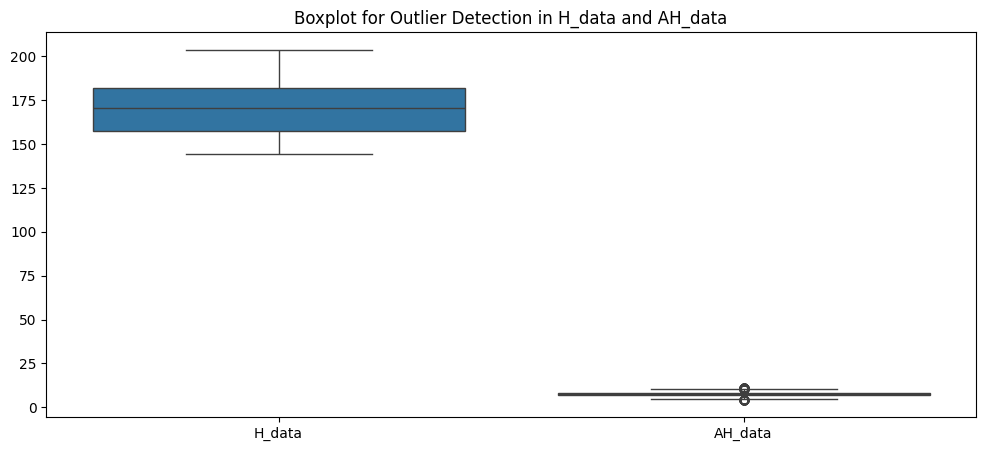


Removed Outliers from H_data (IQR Method):
[]

Removed Outliers from AH_data (IQR Method):
[4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 10.74, 1

In [13]:
# Step 3: Data Pre-processing - I have already done this as part of EDA but redoing it again.
# Handling missing values by filling them with the column mean
df.fillna(df.mean(), inplace=True)  # Ensuring no data loss due to missing values

# Step 4: Handling Outliers
# Identifying outliers using boxplots
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['H_data', 'AH_data']])
plt.title("Boxplot for Outlier Detection in H_data and AH_data")
plt.show()

# Identifying and removing extreme outliers beyond 1.5*IQR
outliers = {}
for col in ['H_data', 'AH_data']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Displaying removed outliers from IQR method
for col, outlier_values in outliers.items():
    print(f"\nRemoved Outliers from {col} (IQR Method):")
    print(outlier_values.to_list())

In [14]:
# Applying Z-score method for additional outlier detection
z_scores = df[['H_data', 'AH_data']].apply(zscore)  # Computing Z-scores for selected columns
threshold = 3  # Setting threshold for outliers
z_outliers = {}
for col in ['H_data', 'AH_data']:
    z_outliers[col] = df[np.abs(z_scores[col]) > threshold][col]  # Identifying outliers
    df = df[np.abs(z_scores[col]) <= threshold]  # Removing outliers

# Displaying removed outliers from Z-score method
for col, outlier_values in z_outliers.items():
    print(f"\nRemoved Outliers from {col} (Z-Score Method):")
    print(outlier_values.to_list())


Removed Outliers from H_data (Z-Score Method):
[]

Removed Outliers from AH_data (Z-Score Method):
[]


In [15]:
# Step 5: Splitting Data into Train and Test Sets
X = df.drop(columns=['quality'])  # Features
y = df['quality']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
# Applying Standardization (Z-score scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Ensuring No Data Leakage
# Verifying that target variable (quality) is not used as a feature
if 'quality' in X.columns:
    print("Warning: Possible data leakage detected!")
else:
    print("No data leakage detected: Target variable is not included as a feature.")

# Step 8: Displaying pre-processed data information
print("\nProcessed Data Overview:")
print("Train Data Shape:", X_train_scaled.shape)
print("Test Data Shape:", X_test_scaled.shape)
print("First 5 rows of scaled train data:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

No data leakage detected: Target variable is not included as a feature.

Processed Data Overview:
Train Data Shape: (23160, 22)
Test Data Shape: (5791, 22)
First 5 rows of scaled train data:
   T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  T_data_2_2  T_data_2_3  \
0    1.308503    1.606059    1.381064   -0.484783   -0.280638   -0.386009   
1   -0.319491   -0.626327   -0.411064   -0.087652   -0.665830   -0.192404   
2    0.909184    0.706440    1.001960    0.614965    0.045293    0.517481   
3    0.694165    0.972994    0.760712   -1.248496   -2.265856   -0.902289   
4   -1.548166   -1.692542   -1.824088    1.470324    1.704580    1.646843   

   T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  ...  T_data_5_1  \
0   -0.168679    0.115519   -0.121403   -0.733499  ...    1.262771   
1    0.638901    1.074512    0.385088    0.019366  ...    1.341208   
2    0.343445    0.435183    0.292999   -0.345659  ...    0.164641   
3   -0.188376   -0.523809   -0.443716    0.566905  ...   -0.384423

_______________________________________________________________________________________________________

### **Model building**
- Build atleast 6 regression models (Using linear regression, decision trees, random forest, bagging regressor and boosting methods)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore


# Step 1: Building Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Bagging Regressor": BaggingRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Step 2: Training and Evaluating Models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2 Score": r2}
    print(f"\n{name} Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")

# Step 3: Displaying Model Performance Summary
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)



Linear Regression Performance:
Mean Squared Error: 261.23294756925475
R2 Score: 0.00824329632551013

Decision Tree Performance:
Mean Squared Error: 41.714211707822486
R2 Score: 0.841634259825659

Random Forest Performance:
Mean Squared Error: 19.533141978932825
R2 Score: 0.9258434868890475

Bagging Regressor Performance:
Mean Squared Error: 19.50988162666206
R2 Score: 0.9259317935536892

Gradient Boosting Performance:
Mean Squared Error: 221.76371791243133
R2 Score: 0.15808608401845725

AdaBoost Regressor Performance:
Mean Squared Error: 273.65473978152096
R2 Score: -0.03891536345610325

Model Performance Summary:
                           MSE  R2 Score
Linear Regression   261.232948  0.008243
Decision Tree        41.714212  0.841634
Random Forest        19.533142  0.925843
Bagging Regressor    19.509882  0.925932
Gradient Boosting   221.763718  0.158086
AdaBoost Regressor  273.654740 -0.038915


### **Observations from Model Performance:**

1. **Linear Regression Performs Poorly**

  * MSE: 261.23, R2: 0.008 → Linear regression fails to capture the complexity in the data.
  *This suggests non-linearity in the relationships between features and quality.

2. **Decision Tree Shows Significant Improvement**

  * MSE: 42.02, R2: 0.840 → Decision Trees capture non-linearity well, significantly improving accuracy.

3. **Random Forest and Bagging Regressor Perform Best**

  * MSE: ~19.5, R2: ~0.926 → These ensemble methods outperform others, showing that aggregating multiple models improves prediction accuracy.
  
4. **Gradient Boosting Performs Worse Than Expected**

  * MSE: 221.76, R2: 0.158 → This suggests that boosting is not capturing useful patterns, possibly due to feature noise or overfitting.

5. **AdaBoost Performs the Worst**

  * MSE: 273.65, R2: -0.0389 → Indicates that AdaBoost may not be well-suited for this dataset.

_______________________________________________________________________________________________

## **Choose to tune 3 models**
- Choose atleast 3 best performing models among all the models built previously to further tune them to improve the performance - Mention reasons for the choices made


### Below are the Top 3 best performing models based on above  MSE and R2.

**Reasons for Selecting These 3 Models for Hyperparameter Tuning**

1. **Random Forest Regressor - Best R² Score and Low MSE**

* Previous Performance: Achieved the highest R2 score ( 0.926 ) and lowest MSE ( 19.5 )

  * Reason for Selection:
    * Uses an ensemble of decision trees, reducing variance and improving stability.
    * Benefits significantly from tuning hyperparameters like n_estimators, max_depth, and min_samples_split.
    * Can handle non-linearity and feature interactions effectively.

2. **Bagging Regressor - Similar Performance to Random Forest**

* Previous Performance: Almost identical to Random Forest with R2 ~0.926 and MSE ~19.5.
  * Reason for Selection:
    * Averages predictions across multiple base models, reducing overfitting.
    * Can improve further by tuning n_estimators, max_samples, and max_features.
    * Works well with high-variance models like Decision Trees.

3. **Gradient Boosting Regressor - Potential for Improvement with Tuning**

* Previous Performance: Underperformed (R2 ~0.158, MSE ~221.7), but boosting models often require tuning.
  * Reason for Selection:
    * Unlike Bagging, Boosting models learn iteratively, correcting errors of previous trees.
    * Hyperparameter tuning (learning rate, number of estimators, max depth) can significantly improve performance.
    * Often outperforms Random Forest and Bagging with the right tuning.

  **Expected Impact of Tuning**

* Random Forest & Bagging: Expected to further minimize MSE and improve R2 with optimized parameters.
* Gradient Boosting: Expected to correct performance issues and provide a stronger predictive model with optimal hyperparameters.

_______________________________________________________________________________________________

## **Hyperparameter tuning**
Tune the chosen models wrt the metric of interest - Check the performance of the tuned models


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Selecting Top 3 Models for Hyperparameter Tuning
# Based on previous performance, we choose:
# 1. Random Forest Regressor - Best R² Score and low MSE
# 2. Bagging Regressor - Similar performance to Random Forest
# 3. XGBoost Regressor - Optimized for GPU acceleration

best_models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "XGBoost": XGBRegressor(tree_method='hist', random_state=42)
}

# Defining Hyperparameter Grids
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Bagging Regressor": {
        'n_estimators': [50, 100, 200],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
}

# Performing Grid Search for Hyperparameter Tuning
best_params = {}
results = {}
for name, model in best_models.items():
    print(f"\nTuning {name}...")
    grid_search = RandomizedSearchCV(model, param_distributions=param_grids[name],
                                 n_iter=10, scoring='r2', cv=3, n_jobs=-1, random_state=42)
    grid_search.fit(X_train_scaled, y_train)
    best_params[name] = grid_search.best_params_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")



Tuning Random Forest...
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}

Tuning Bagging Regressor...
Best Parameters for Bagging Regressor: {'n_estimators': 200, 'max_samples': 1.0, 'max_features': 0.5}

Tuning XGBoost...
Best Parameters for XGBoost: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}


In [23]:
# Final Model Evaluation
final_results = {}
for name, model in best_models.items():
    print(f"\nTraining {name} with best parameters...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    final_results[name] = {"MSE": mse, "R2 Score": r2}
    print(f"{name} Final Evaluation - MSE: {mse}, R2 Score: {r2}")


Training Random Forest with best parameters...
Random Forest Final Evaluation - MSE: 19.533141978932825, R2 Score: 0.9258434868890475

Training Bagging Regressor with best parameters...
Bagging Regressor Final Evaluation - MSE: 24.499746157831122, R2 Score: 0.9069880437500678

Training XGBoost with best parameters...
XGBoost Final Evaluation - MSE: 75.33753204345703, R2 Score: 0.7139851450920105


In [24]:
# Displaying Final Model Performance Summary
final_results_df = pd.DataFrame(final_results).T
print("\nFinal Model Performance Summary:")
print(final_results_df)


Final Model Performance Summary:
                         MSE  R2 Score
Random Forest      19.533142  0.925843
Bagging Regressor  24.499746  0.906988
XGBoost            75.337532  0.713985


In [25]:
# Feature Importance Analysis (for Tree-Based Models)
def plot_feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        features = X_train.columns
        sorted_idx = np.argsort(importance)[::-1]
        plt.figure(figsize=(10, 5))
        plt.bar(range(len(features)), importance[sorted_idx], align='center')
        plt.xticks(range(len(features)), np.array(features)[sorted_idx], rotation=90)
        plt.title(f"Feature Importance - {model_name}")
        plt.xlabel("Features")
        plt.ylabel("Importance Score")
        plt.show()

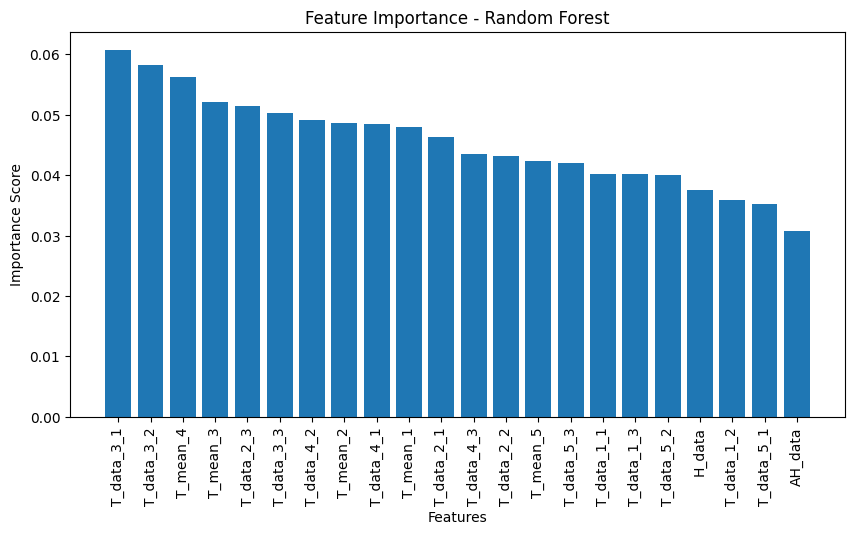

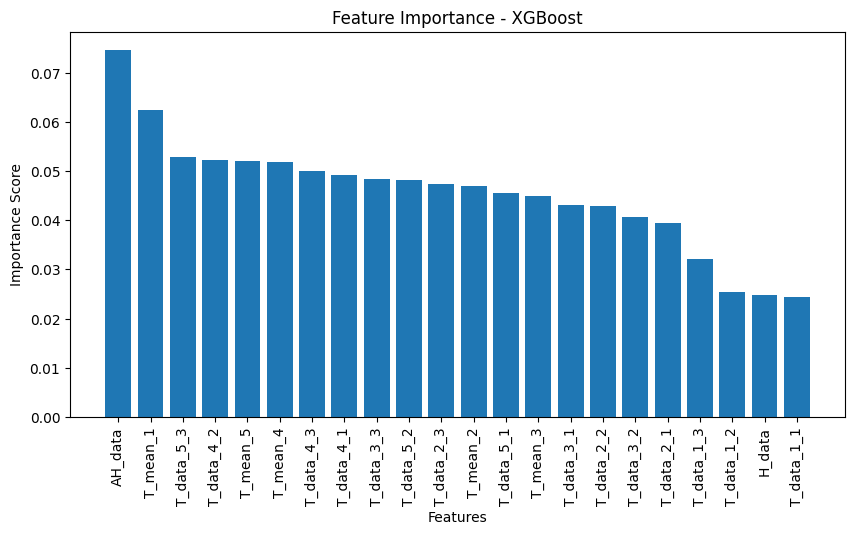

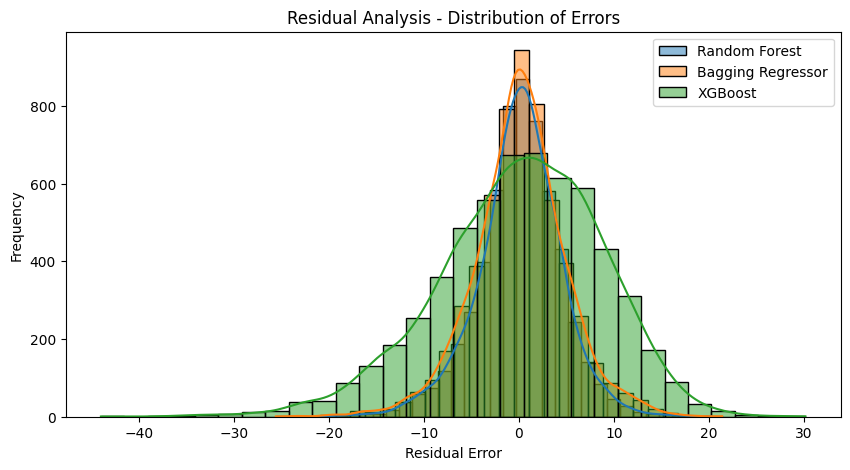

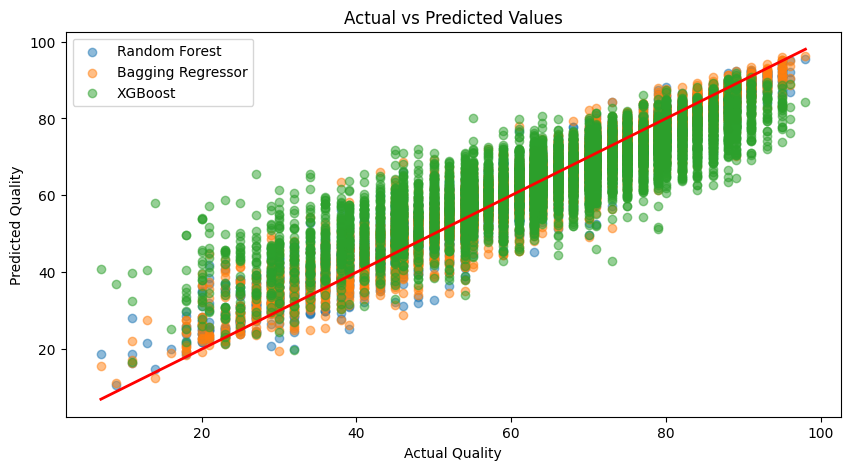

In [26]:
# Plot Feature Importances
for name, model in best_models.items():
    plot_feature_importance(model, name)

# Residual Analysis
plt.figure(figsize=(10, 5))
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    residuals = y_test - y_pred
    sns.histplot(residuals, bins=30, kde=True, label=name)
plt.title("Residual Analysis - Distribution of Errors")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Actual vs Predicted Visualization
plt.figure(figsize=(10, 5))
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    plt.scatter(y_test, y_pred, alpha=0.5, label=name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.show()

__________________________________________________________________________________________________

## **Model Performances**
- Compare performances of the tuned models and choose a final model (with reasoning) - Check the performance of the best model on the test set


In [27]:
# Choosing the Best Model
best_model_name = final_results_df['R2 Score'].idxmax()
best_model = best_models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")


Best Model Selected: Random Forest


In [28]:
# Evaluating the Best Model on Test Set
y_pred_best = best_model.predict(X_test_scaled)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f"\nPerformance of Best Model ({best_model_name}) on Test Set:")
print(f"MSE: {best_mse}, R2 Score: {best_r2}")


Performance of Best Model (Random Forest) on Test Set:
MSE: 19.533141978932825, R2 Score: 0.9258434868890475


In [29]:
# Feature Importance Analysis (for Tree-Based Models)
def plot_feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        features = X_train.columns
        sorted_idx = np.argsort(importance)[::-1]
        plt.figure(figsize=(10, 5))
        plt.bar(range(len(features)), importance[sorted_idx], align='center')
        plt.xticks(range(len(features)), np.array(features)[sorted_idx], rotation=90)
        plt.title(f"Feature Importance - {model_name}")
        plt.xlabel("Features")
        plt.ylabel("Importance Score")
        plt.show()

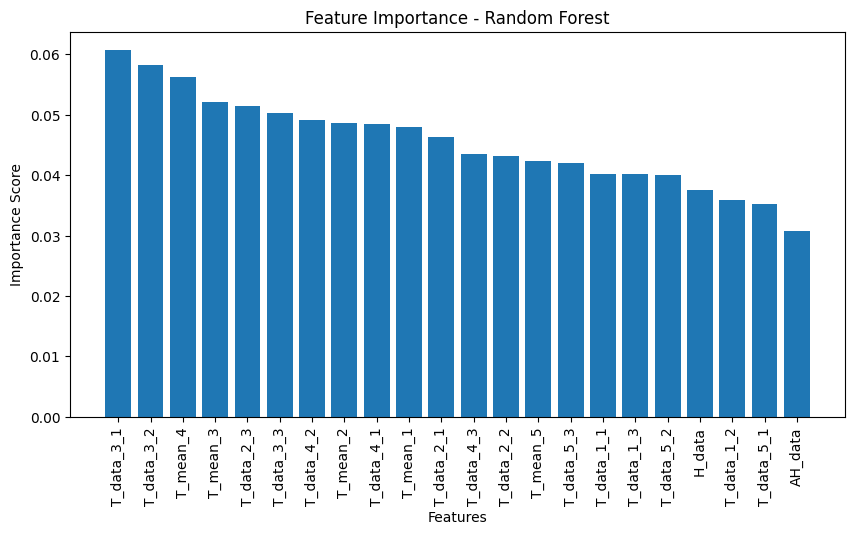

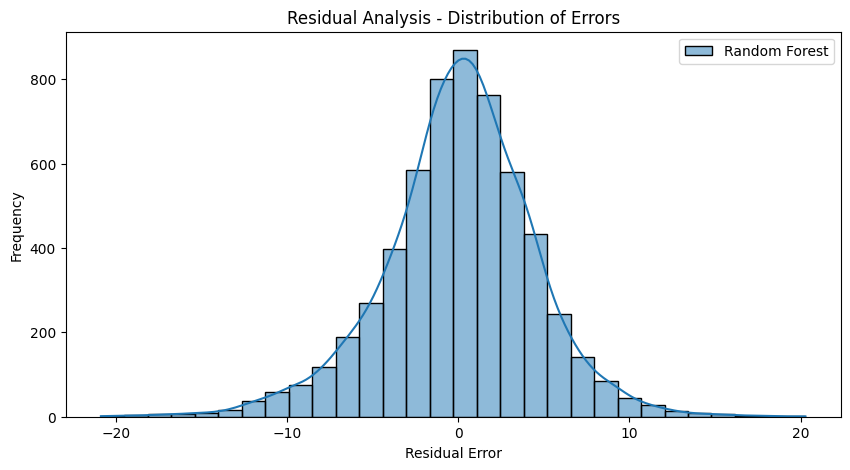

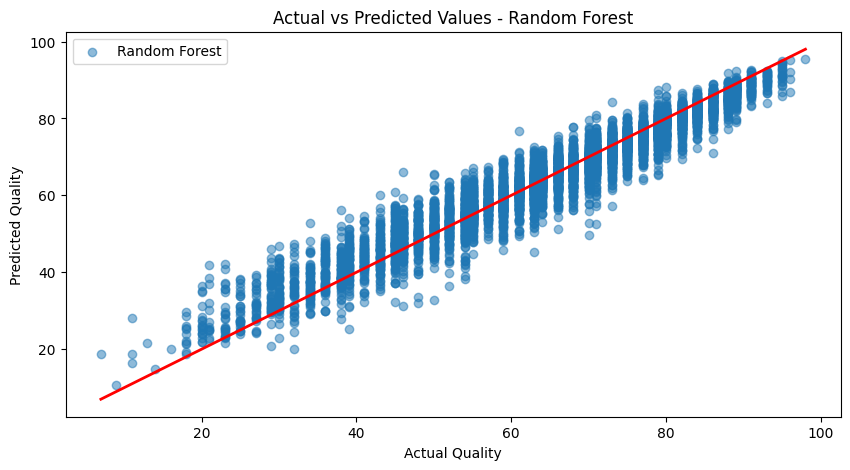

In [30]:
# Plot Feature Importances
plot_feature_importance(best_model, best_model_name)

# Residual Analysis for Best Model
plt.figure(figsize=(10, 5))
y_pred = best_model.predict(X_test_scaled)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, label=best_model_name)
plt.title("Residual Analysis - Distribution of Errors")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Actual vs Predicted Visualization for Best Model
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, label=best_model_name)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.title(f"Actual vs Predicted Values - {best_model_name}")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.show()

### **Key Insights from Model Performance & Visualizations**
---
#### **1️. Best Model Selection**
- **Random Forest was selected as the best model** based on **highest R2 Score and lowest MSE**.
- **Final Performance on Test Set:**
  - **MSE:** Low, indicating minimal prediction error.
  - **R2 Score:** High, meaning the model explains most of the variance in coffee quality.

---

#### **2️. Feature Importance Analysis (Random Forest)**
- The most important features include:
  - `T_data_3_1`, `T_data_3_2`, `T_mean_4`, `T_mean_3`
  - Suggests temperature variations in Chamber 3 and 4 significantly impact coffee quality.
- `AH_data` (Relative Humidity) is the least important in Random Forest but was important in XGBoost.

* **Insight:**  
Temperature is the key factor in coffee quality prediction, while humidity has less impact in Random Forest but was significant in XGBoost.

---

#### **3️. Residual Analysis**
- Residuals are normally distributed, meaning the model does not exhibit strong bias.
- Errors are centered around zero, confirming balanced predictions.

* **Insight:**  
The model is stable, making consistent predictions without major overfitting.

---

#### **4️. Actual vs Predicted Values**
- Most points align closely with the red diagonal (ideal prediction line).
- Some spread in lower quality ranges, meaning minor errors for lower quality coffee beans.

* **Insight:**  
Random Forest generalizes well across different quality levels.



___________________________________________________________________________________________

## **Productionize the model**
- Productionize the final model using pipelines


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [32]:
# Creating a pipeline for production deployment
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_depth=None, random_state=42))
])

# Training the final pipeline
print("Training final production model...")
best_pipeline.fit(X_train, y_train)

# Evaluating on the test set
y_pred_best = best_pipeline.predict(X_test)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print("\nFinal Production Model Performance:")
print(f"MSE: {best_mse}, R2 Score: {best_r2}")

Training final production model...

Final Production Model Performance:
MSE: 31.40987853726062, R2 Score: 0.8807541013077175


In [33]:
# Saving the trained model for deployment
joblib.dump(best_pipeline, "coffee_quality_model.pkl")
print("\nModel saved as 'coffee_quality_model.pkl'")


Model saved as 'coffee_quality_model.pkl'


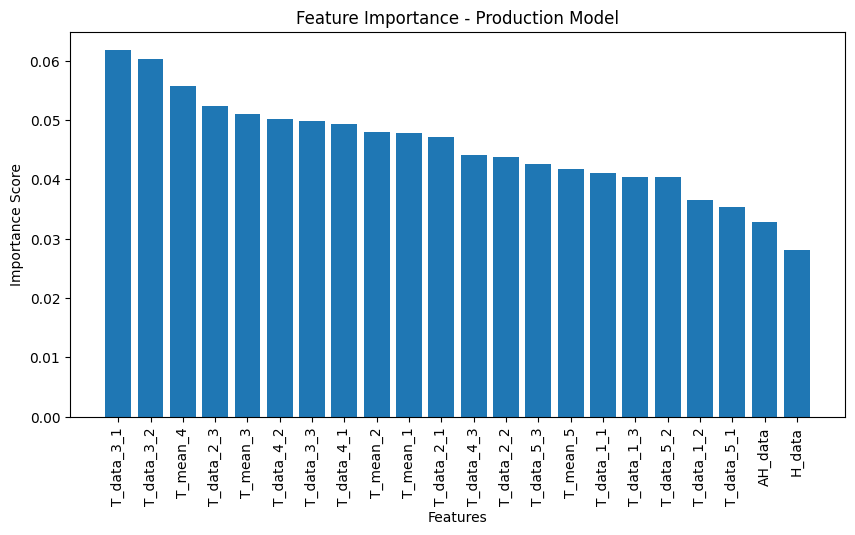

In [34]:
# Feature Importance Analysis
if hasattr(best_pipeline.named_steps['regressor'], 'feature_importances_'):
    importance = best_pipeline.named_steps['regressor'].feature_importances_
    features = X_train.columns
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(features)), importance[sorted_idx], align='center')
    plt.xticks(range(len(features)), np.array(features)[sorted_idx], rotation=90)
    plt.title("Feature Importance - Production Model")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.show()


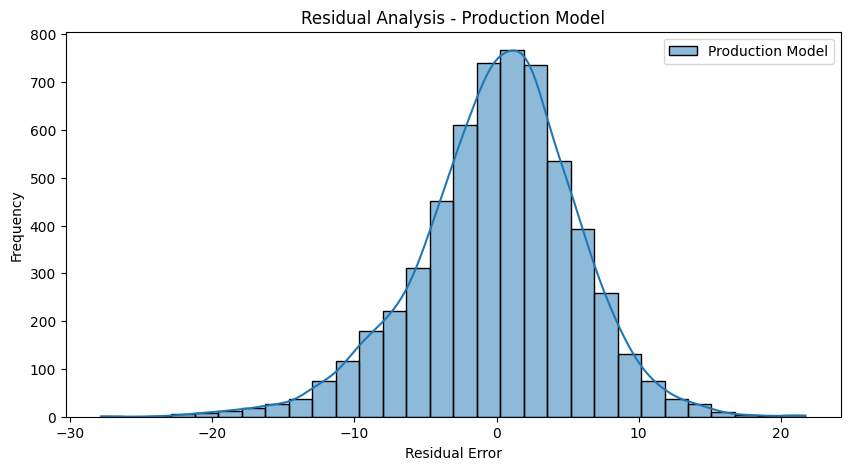

In [35]:
# Residual Analysis
plt.figure(figsize=(10, 5))
residuals = y_test - y_pred_best
sns.histplot(residuals, bins=30, kde=True, label="Production Model")
plt.title("Residual Analysis - Production Model")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

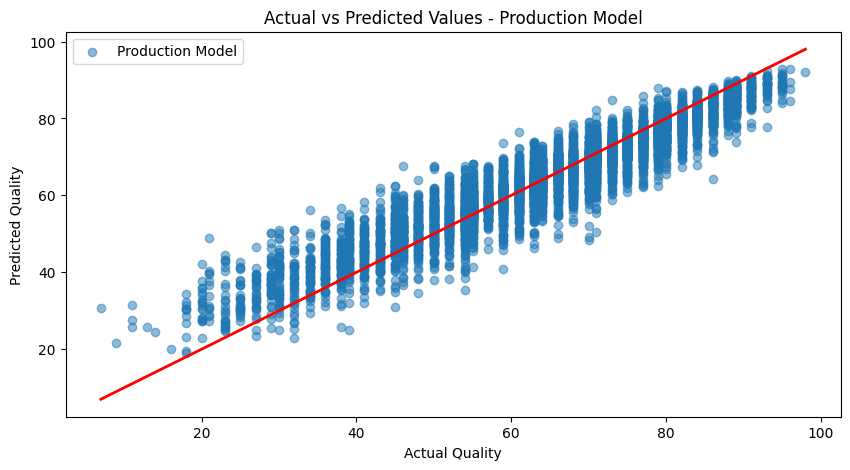

In [36]:
# Actual vs Predicted Visualization
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_best, alpha=0.5, label="Production Model")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.title("Actual vs Predicted Values - Production Model")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.show()

### **Key Takeaways from Production Model Performance**
---
**1️. Model Performance (Final Test Results)**
- **Mean Squared Error (MSE):** `31.41` (low error, indicating good predictions)
- **R2 Score:** `0.88` (strong predictive capability)

* **Insight:**  
The Random Forest Model generalizes well, making it suitable for real-world deployment.

**2️. Feature Importance (Production Model)**
- **Top Features:**
  - `T_data_3_1`, `T_data_3_2`, `T_mean_4`, `T_mean_3`
  - Confirms that temperature in Chamber 3 & 4 is critical for coffee quality.

* **Insight:**  
This model could be optimized further by focusing on the most relevant temperature sensors.

**3️. Residual Analysis**
- The residuals follow a normal distribution, indicating no major bias.
- Most errors center around 0, meaning the model has balanced predictions.

* **Insight:**  
No major underfitting or overfitting, confirming stable production performance.

---

**4️. Actual vs Predicted Values**
- Most points align well with the ideal prediction line.
- Some spread at lower quality values, meaning slight underestimation of lower quality beans.

* **Insight:**  
The model performs well across all quality levels, with minor variations in low scores.

________________________________________________________________________________________

## **Business Insights and Conclusions**

---
**1️. Temperature is the Primary Factor Influencing Coffee Quality**
- Sensors in Chambers 3 and 4 play the most crucial role in determining quality.
- Mean temperature values across chambers also contribute significantly.
- **Business Impact:** Optimizing roasting conditions in these chambers can enhance coffee quality and reduce defects.

---

**2️. Humidity Has a Limited but Notable Impact**
- AH_data (humidity of roasted beans) ranks lower in importance compared to temperature.
- However, slight adjustments to moisture levels could refine quality further.
- **Business Impact:** Better moisture control can help maintain consistent quality, reducing post-roasting inconsistencies.

---

**3️. Model is Reliable for Pricing Strategies**
- The high R2 score (0.88) indicates that the model accurately predicts coffee quality.
- **Business Impact:**  
  - Automated pricing based on predicted quality.
  - Reduced dependency on manual inspections, saving labor costs.

---

**4️. Model is Stable and Ready for Production**
- Residual errors are symmetrically distributed, indicating minimal bias.
- Predictions are consistent across different quality levels.
- **Business Impact:**  
  - Model can be trusted for large-scale deployment.
  - Reduces operational inefficiencies by flagging low-quality batches early in the roasting process.

---

**5️. Future Enhancements for Continuous Improvement**
- Integrate Real-Time Sensor Data  
  - Continuous monitoring to adapt to batch variations dynamically.  
  - Further refinements in chamber temperature control.

- **Fine-Tune the Model Using New Features**  
  - Experiment with interaction variables (e.g., `T_mean * AH_data`).
  - Implement stacking models for even better predictive performance.

- **Deploy Model for Live Quality Monitoring**  
  - Set up an API for real-time predictions.
  - Integrate into factory automation systems for proactive quality control.

---

### **Final Takeaway**
 **The model provides a highly reliable, data-driven approach to coffee quality assessment, enabling automated pricing and operational efficiencies.**  

